In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import _Hunt_depleation as hd
import _AquiferTest as at

# Øvelse: Beregning af sænkning i et spændt magasin som følge af vandindvinding. 

I denne opgave skal vi se på beregning af sænkning i grundvandsspejlet som følge af vandindvinding i et grundvandsmagasin og vi skal se på hvordan vandindvindingen påirker vandløbsafstrømningen i et frit magasin med direkte kontakt imellem grundvandsmagasinet og vandløbet.

I den første del af opgaven anvender vi Theis løsningen til at beregne sænkningen i et spændt grundvandsmagasin på baggrund af de transmissiviteter i tidligere bestemte på baggrund af renpumpningsdata fra Jupiter Databasen

- Beregn sænkninger for 2 af de boringer som i bestemte transmissiviteter for i den tidligere øvelse I Nordfyns Kommune. Sæt indvindingsmængden til 100.000 m3/år
- Beregn sænkninger i forskellige afstande 100 m, 200 m og 300 m afstand
- Da vi kun estimerede transmissiviteten skal vi se på hvad diffusiviteten (altså ændringen i magasintallet) har af betydning for sænkningsudbredelsen
- Hvor lang tid skal der pumpes før det virker til at responset har stabiliseret sig? Under forskellige forhold (Transmissivitet og magasintal)

![Theis løsnigen](img/Theis_solution.png)

*Løsningen beregnes ved anvendelse af Theis ligningen*

In [131]:
# funktion til at beregne sænkningen i grundvandsmagasinet i en given afstand og den efterfølgende stabilisering af vandpsejlet igen
def drawdown_recovery(Ydelse, T, S, afstand, max_pumpetid):
    times = np.arange(1,int((max_pumpetid)*2+1), 1, dtype = float)  # liste med tider hvor vi vil beregne sænkningen
    dd = [0.]
    for itime in times:
        if itime < max_pumpetid:
            dd.append(at.T1945(Ydelse, T, S, afstand, itime))
        else:
            dd.append(at.T1945(Ydelse, T, S, afstand, itime)-at.T1945(Ydelse, T, S, afstand, itime-max_pumpetid))
    
    return dd


def drawdown_recovery_Hunt(x1, y1, L, max_pumpetid, Lambda, S, T, Ydelse):
    sigma = 0.1  
    
    times = np.arange(1,int((max_pumpetid)*4+1), 1, dtype = float)  # liste med tider hvor vi vil beregne sænkningen
    
    dd = [0.]
    
    for itime in times:
        if itime < max_pumpetid:
            dd.append(hd.Hunt_drawdown(x1, y1, L, itime, Lambda, S, sigma, T, Ydelse))
        else:
            dd.append(hd.Hunt_drawdown(x1, y1, L, itime, Lambda, S, sigma, T, Ydelse) - hd.Hunt_drawdown(x1, y1, L, itime-max_pumpetid, Lambda, S, sigma, T, Ydelse))
            
    return dd

def deplation_Hunt(max_pumpetid, T, S, L, Lambda, Ydelse):
    sigma = 0.1  
    
    times = np.arange(1,int((max_pumpetid)*4+1), 1, dtype = float)  # liste med tider hvor vi vil beregne sænkningen
    
    dep = [0.]
    
    for itime in times:
        if itime < max_pumpetid:
            dep.append(hd.Hunt_depleation(itime, T, S, L, Lambda, sigma, Ydelse))
        else:
            dep.append(hd.Hunt_depleation(itime, T, S, L, Lambda, sigma, Ydelse) - hd.Hunt_depleation(itime-max_pumpetid, T, S, L, Lambda, sigma, Ydelse))
            
    return dep

In [132]:
max_pumpetid = 365. # antal dage hvor er indvindes vand fra boringen
S = 0.0001 # specifikt magasintal anvendt i analysen
T = 0.0012 * 60*60*24 # transmissivitet i m3/dag
Ydelse = 87500. / 365.25 # vandindvinding i m3/dag
afstand = 100  # afstand fra pumpeboringen hvor vi vil beregne sænkningen



In [133]:
# beregn sænkning og stabilisering af vandspejlet
saenkning = drawdown_recovery(Ydelse, T, S, afstand, max_pumpetid)

c:\Users\TRNV\OneDrive - NIRAS\_Projects\10422645 - Kursus i indvindingstilladelser - Ferskvandscentret\Undervisning\Øvelser\_AquiferTest.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  u = (r ** 2 * S) / (4. * T * t)


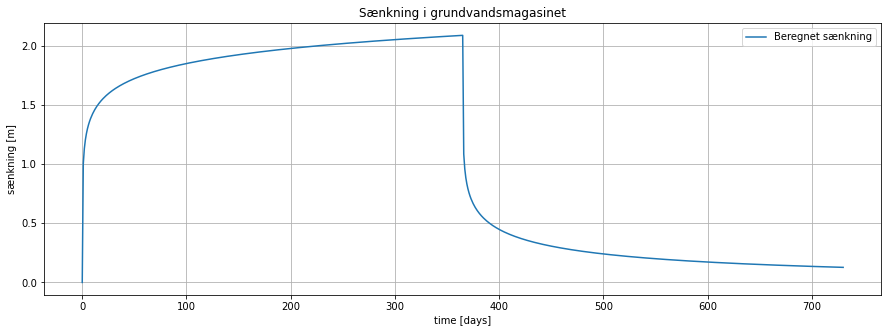

In [134]:
fig, ax = plt.subplots(1,1, figsize=(15,5))

ax.plot(np.arange(len(saenkning)), saenkning, label = 'Beregnet sænkning')
ax.set_xlabel('time [days]')
ax.set_ylabel('sænkning [m]')
ax.set_title('Sænkning i grundvandsmagasinet')
ax.grid('on')
plt.legend()

# Øvelse: Beregn sænkning og påvirkning af vandløb for et frit magasin
Beregn strømningsreduktionsforholdet for vandløbet ΔQ/Qw. 
Beregn også sænkningen ved positionen (X, Y)=(50 m, 100 m)
X=0 er ved vandløbet, mens indvindingsboringen er placeret ved (X, Y)=(100 m, 0 m). 

![Hunt løsning](img/Hunt_setup.png)

*Løsningen beregnes ved anveldelse af "Hunt 1999, Unsteady stream depleation from groundwater pumping, Groundwater vol 37, no 1"*

In [155]:
max_pumpetid = 90. # antal dage hvor er indvindes vand fra boringen
S = 0.1 # specifikt magasintal anvendt i analysen
T = 0.0012 * 60*60*24 # transmissivitet i m3/dag
Ydelse = 87500. / 365.25 # vandindvinding i m3/dag

Lambda = 1 # strømningsmodstand for vandløbsbunden. Lavere værdier større modstand
L = 100 # afstanden fra boringen til vandløb
x1, y1 = 50, 100 # relative koordinater til observationspunktet


__Beregn sænkningen i observationspunktet__

In [156]:
dd = drawdown_recovery_Hunt(x1, y1, L, max_pumpetid, Lambda, S, T, Ydelse)

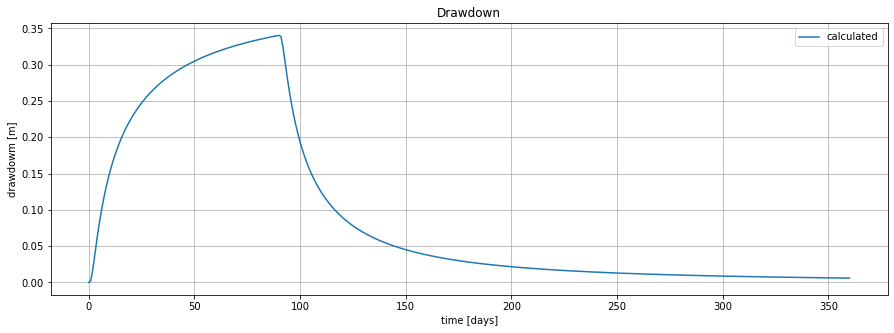

In [157]:
f1 = plt.figure(figsize=(15,5))
ax = f1.add_subplot(1,1,1)

ax.plot(np.arange(len(dd)), dd, label = 'calculated')
ax.set_xlabel('time [days]')
ax.set_ylabel('Sænkning [m]')
ax.set_title('Sænkning')
ax.grid('on')
plt.legend()

__Beregn andelen af vandet fra boringen der kommer direkte fra vandløbet__ 

In [158]:
depleation = deplation_Hunt(max_pumpetid, T, S, L, Lambda, Ydelse)

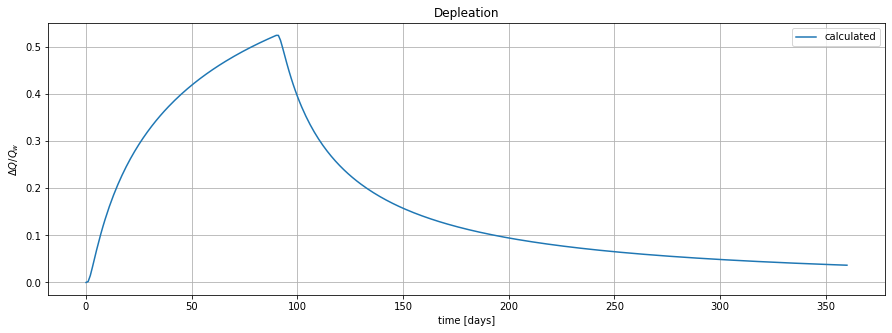

In [159]:
f1 = plt.figure(figsize=(15,5))
ax = f1.add_subplot(1,1,1)

ax.plot(np.arange(len(depleation)), depleation, label = 'calculated')
ax.set_xlabel('time [days]')
ax.set_ylabel('$\Delta Q/Q_w$')
ax.set_title('Depleation')
ax.grid('on')
plt.legend()